# Mercedes-Benz Greener Manufacturing
Can you cut the time a Mercedes-Benz spends on the test bench?

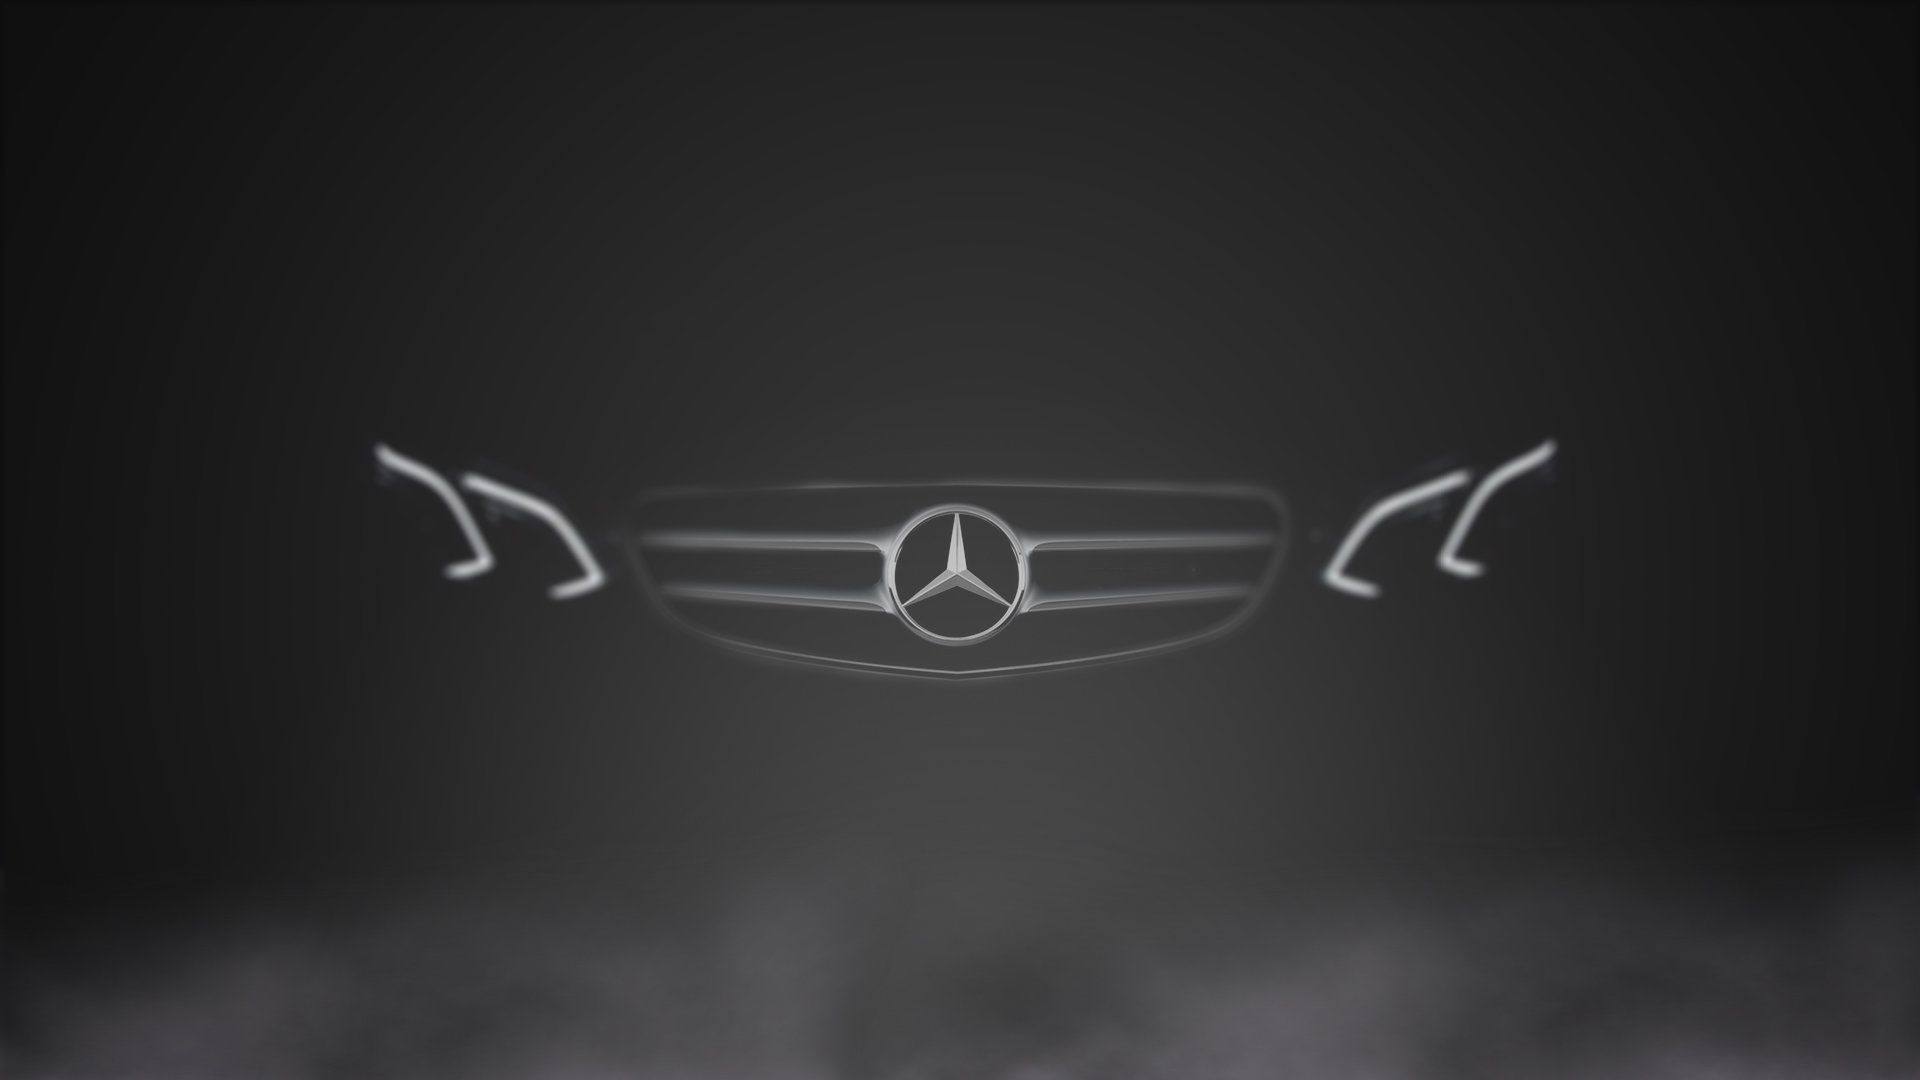

Image by: https://i.pinimg.com/originals/5b/ac/4e/5bac4e30d414a7eda8d137af0b1b33d4.jpg

# 1. Business Problem

## 1.1 Description

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

### Problem Statemtent:

- Any car we see running on the road is not manufactured and put directly on the road for our use. Every car or a bike or any other running vehicle on the road we see on the road goes through several testing procedures which it has to pass so as to hit the road for regular use. These testing is performed so as to ensure safety and reliability of the vehicle when it will be used in real world scenarios. Testing can include many steps so it is obviously a time consuming process. More time is required for testing, since tests should be performed considering all the real life situations, So more testing time leads to more testing cost and also as the testing time increases, Co2 emissions from the vehicle also increases with that. But testing is a very essential step and no automobile manufacturer can skip this because every vehicle configuration they manufacture has to go through all the testings so as to ensure the safety of the occupants and the reliability of that vehicle. So as a popular premium automaker Mercedez cannot compromise about safety of the vehicle and the occupant in fact all the vehicle manufacturer’s goal is to   have a robust and efficient testing system, and nowadays all of them are moving towards automation. 

- Mercedes Benz and all other automakers are trying to automate their testing    systems so as to develop efficient testing systems for their vehicles. Automated systems         will help to eliminate the errors due to variability in human behaviours which is inherent and also it is safer to auto test than putting a human on the driver seat for testing. So aim is to reduce testing time by analyzing the current available data which is collected from hundreds of tests on thousands of car configurations. 

- Basic problem statement is to create a machine learning model that will predict accurate time a car spends on the test bench. The car configuration is nothing but selected various customization options available and the features for a particular car. Accurate models will help to reduce the total time spent for testing by allowing the vehicles with the same configurations to test successively.

- There are many features in the car configuration, e.g. if there are any cars belong to some class-D but they have one/many additional feature which other class-D cars don't have that/those features, in such cases there will be different testing time for them. Hence for such cases machine learning model can help predicting accurate time spent on test bench for cars with same class but some different features.


### Source:
This problem belong to one of the competitions held on kaggle. Which can be found on following link:
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview

## 1.2. Business Objectives and Constraints

- Predicting accurate time a car spends on the test bench
- No strict latency constraints, few seconds to few minutes prediction time is okay, but not hours.

# 2. Machine Learning problem 

## 2.1 Data

### 2.1.1 Data Overview 
This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

We have two comma separated files:
- **train.csv** - Contains the training set with 4209 rows (datapoints) and 378 columns (features) with labels
- **test.csv** - Contains the test set with 4209 rows (datapoints) and 377 columns (features) with no labels

Columns:
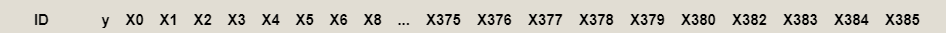

Link to the data set:
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

## 2.2 Mapping the real-world problem to a Machine Learning Problem

 ### 2.2.1 Type of Machine Learning Problem 
As our aim is to predict the testing time which is a continuous variable, we can surely say this is a **regression** machine learning problem. 
And as we have a labelled dataset here, it is a supervised machine learning problem. 
Mercedes Benz will implement the best performing model into their testing procedure which will result in efficient testing without harming their   standards and which also will help greener manufacturing by reduction of Co2 emissions.

### 2.2.2 Performance metric


Now we know this is a machine learning regression problem, we have to use an appropriate metric for the performance evaluation of our prediction model. Here it is already given in the competition to use the R^2  metric for evaluation.  R^2 is also known as Coefficient of Determination, R-squared gives the percentage variation in ‘y’ (test time in this case)  explained by ‘x-variables’ (combination of car custom features in this case). In simple words R^2 gives us the percentage of data points that fall within the regression line. The  higher the R^2 value, higher will be the data points that fall within the line. E.g. if R^2 value is 0.66 then it indicates that 66% data points are lying within the regression line of the total data points.
Mathematically R^2 is denoted as follows: 

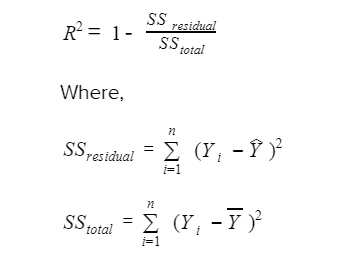

There 4 cases for the values of R^2:

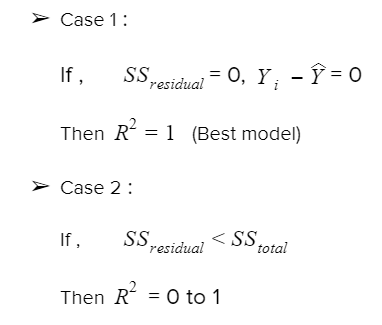

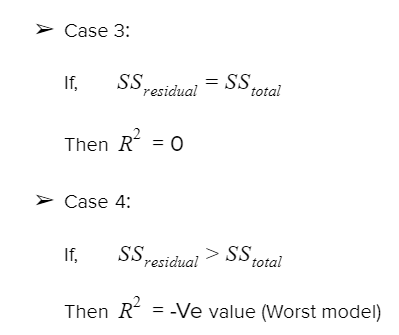

R^2 metric is very sensitive to outliers. The algorithm that best explains the variation in testing times will be the optimal machine learning model for the task. So this is the best metric to be used for evaluation in this problem, as Mercedes is really interested to know how the different testing times for different configurations can be represented in a machine learning model. 

As I have explained the four cases above we can see R^2 metric ranges from -∞ to 1 as -∞ R^2 score being worst and 1 R^2 score being the best model. Also there are very rare cases where R^2 can be negative, so generally we get a R^2 score between 0 and 1. So for R^2 metric upper bound is 1 but in case of RMSE and MAE, score ranges from 0 to ∞(infinity) there is no upper bound so it will be difficult for us to compare the model with baseline model score. The benifit of using R^2 metric is that it is having an upper bound 1 beyond which the score cannot increase so we can compare our model score with the baseline model score, hence R^2 metric is preffered over RMSE and MAE in this problem.

# 3. Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,Normalizer,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.decomposition import TruncatedSVD, PCA 
from sklearn.linear_model import LassoLarsCV,Ridge
from mlxtend.regressor import StackingCVRegressor 
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import r2_score
import joblib
import warnings
warnings.filterwarnings("ignore") 

# 4. Exploratory Data Analysis  and Preprocessing

## 4.1 Data Loading and EDA

### 4.1.1 Load the data

In [2]:
# lets use pandas to load csv files we have
train = pd.read_csv('train.csv')
print(f"total train datapoints = {len(train)}")
train.head()

total train datapoints = 4209


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# now let's have a look at information about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


- Here we can see there are 4209 datapoints indexing from 0 to 4208 and 378 coulmns/features.
- We have three types of data in dataset:
    - float64(1) : Dependent feature, testing time in seconds
    - int64(369): Independent Binary features 
    - object(8): Independent Categorical features

In [4]:
# lets use pandas to load csv files we have
test = pd.read_csv('test.csv')
print(f"total test datapoints = {len(train)}")
test.head()

total test datapoints = 4209


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# now let's have a look at information about dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


- Here we can see there are 4209 datapoints indexing from 0 to 4208 and 377 coulmns/features.
- We have three types of data in dataset:
    - int64(369): Independent Binary features 
    - object(8): Independent Categorical features

- We can see here we have same number of datapoints in train and test dataset.

### 4.1.2 Statistical description of ID and Dependent variables

First I will check for any missing values value in the whole data set.

In [6]:
# check if there are any missing values
isNan = train.isnull().sum().any()

if isNan == True:
    print("There are NaN values in the dataset")
else:
    print("There are No NaN values in the dataset")

There are No NaN values in the dataset


Let's also check for duplicate rows

In [7]:
# check if there are any Duplicate rows
isDup = train.duplicated().sum().any()
if isDup == True:
    print("There are Duplicate rows in the dataset")
else:
    print("There are No Duplicate rows in the dataset")

There are No Duplicate rows in the dataset


In [8]:
# now print the description of the 'ID' and 'y' columns in the dataset
train[['ID','y']].describe()

,ID,y
count,4209.000000,4209.000000
mean,4205.960798,100.669318
std,2437.608688,12.679381
min,0.000000,72.110000
25%,2095.000000,90.820000
50%,4220.000000,99.150000
75%,6314.000000,109.010000
max,8417.000000,265.320000


Now let's check if there are any duplicate values in the 'ID' column.

In [9]:
dup_ID = train['ID'].duplicated().sum()
print(f"Here we have {dup_ID} duplicate IDs")

Here we have 0 duplicate IDs


From above description table we can see,
- 'ID' feature : These are not sequentially given in the data set, they are random. Because have total 4209 configurations and here we have the max number in 'ID' column is 8417, also there are no duplicate 'ID' in the dataset.
- 'y' : This is testing time to be predicted. Here minimum value is 72 and the maximum value is 265. I will do some further analysis of this dependent feature by checking it's distribution.

### 4.1.3 Check the distribution of Dependent variable

####  Histogram of dependent variable

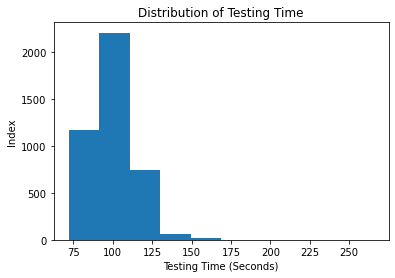

In [10]:
# lets plot histogram for dependent variable 'y'
plt.hist(train['y'])
plt.title("Distribution of Testing Time")
plt.xlabel("Testing Time (Seconds)")
plt.ylabel("Index")
plt.show()

Here I can see the testing time is nearly normal distributed around 100, and most of the configurations are having the testing time between 75 to roughly 150 seconds. Above 150 there are some values as we also checked in previous description table we have one extreme point that we are unable to see here. So let's plot scatter plot of the these times for further analysis.

####  Scatter plot of dependent variable

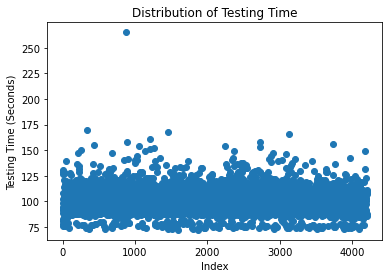

In [11]:
plt.scatter(range(len(train['y'])), train['y'])
plt.title("Distribution of Testing Time")
plt.xlabel("Index")
plt.ylabel("Testing Time (Seconds)")
plt.show()

- From this scatter plot I can see most of the points are belonging to the range 75 to 150 seconds as we previously also seen. Here we are able to see the extreme point which is taking more than 250 seconds for testing. May be this car configuration is one which is bought very rarely, also can be quite expensive one and thus we have only one such datapoint available here. We can consider this as an outlier for sure because it is only one point which is far away from others. 
- Now I have found one outlier, we should check for more outliers. For that let's find out percentiles of testing times and then I will decide a threshold for valid datapoints based on that. We know the 75th percentile is 109 from description table, so now I will just check 90th percentile to 100th percentile only.

In [12]:
# lets find out the 90th to 100th percentiles 
quantiles = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1] 
for i in quantiles: 
    print(f"{i*100}th percentile: ",train["y"].quantile(i))

90.0th percentile:  115.25
91.0th percentile:  116.0484
92.0th percentile:  116.89160000000001
93.0th percentile:  118.0376
94.0th percentile:  119.056
95.0th percentile:  120.80600000000001
96.0th percentile:  122.4
97.0th percentile:  125.89319999999998
98.0th percentile:  129.2992
99.0th percentile:  137.4304
100th percentile:  265.32


I already declared 100th percentile value i.e. 265.32 as an outlier,
now let's check 99th percentile to 99.99th percentile so as to decide the threshold.

In [13]:
# lets find out the 99th to 99.99th percentiles 
quantiles = np.arange(0.99,0.9999,0.001)
for i in quantiles: 
    print(f"{i*100}th percentile: ",train["y"].quantile(i))

99.0th percentile:  137.4304
99.1th percentile:  139.09024
99.2th percentile:  140.1836
99.3th percentile:  140.81639999999993
99.4th percentile:  142.6480000000001
99.5th percentile:  146.23040000000006
99.6th percentile:  149.0374399999998
99.7th percentile:  151.4276800000003
99.8th percentile:  154.68695999999994
99.9th percentile:  160.38328000000087


Let's use 155 as threshold time and consider values all above 155 as outliers

In [14]:
# I will keep only the configurations which have less than 155 seconds test time
clean_train = train[train['y']<155]
print(f"Train data with outlier:{train.shape}")
print(f"Train data without outlier:{clean_train.shape}")
clean_train.head()

Train data with outlier:(4209, 378)
Train data without outlier:(4201, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


Now I have removed the outliers from the dataset, Now I will analyze the independent variables. We have two types of independent variables Categorical and Binary variable. The ID variable is unique configuration number, so I think it is just an index for our datapoints but in random form.

### 4.1.3 Analysis of Independent Features

First I will separate the Binary and Categorical feature names by their data types, so that we can use them for analysis separately.

In [15]:
# collect all the feature names first
features = list(clean_train.columns)

# create two empty lists
cat_features = []
Binary_features = []

# for each feature in the dataset
# check it's datatype and collect the feature name in above created lists
for f in features:
    if clean_train[f].dtype == 'object':
        cat_features.append(f)
    elif clean_train[f].dtype == 'int' and f != 'ID':
        Binary_features.append(f)
print(f"We have total {len(cat_features)} categorical features.")
print(f"We have total {len(Binary_features)} Binary features.")

We have total 8 categorical features.
We have total 368 Binary features.


### 4.1.3.1 Analysis of Categorical Features

In [16]:
cat_train_data = clean_train[cat_features]
# cat_train_data.insert(0, 'y', clean_train['y'])
print(cat_train_data.shape)
cat_train_data.head()

(4201, 8)


,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


Let's plot Boxplot for each categorical feature,

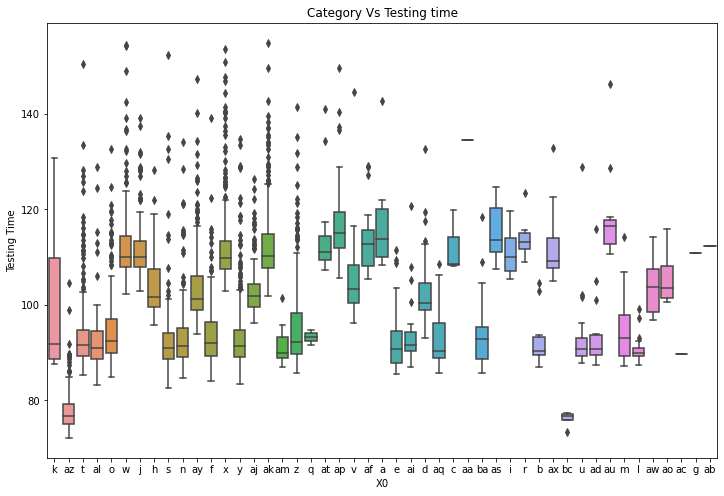

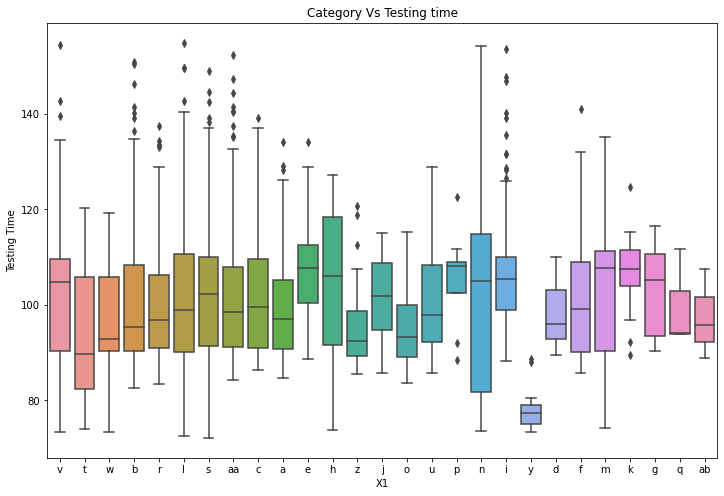

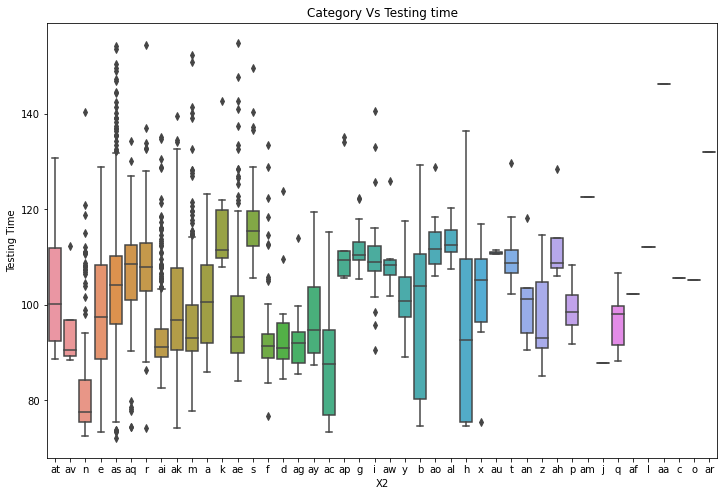

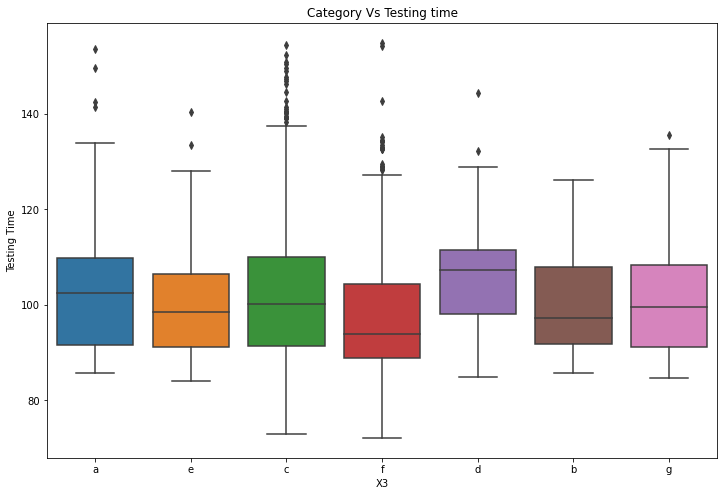

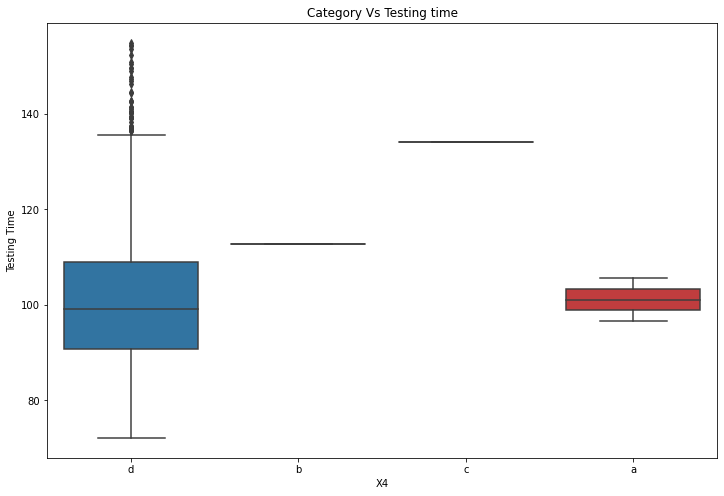

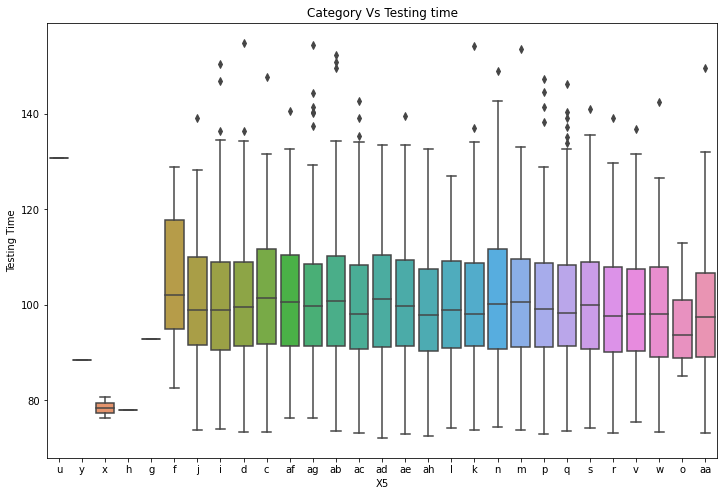

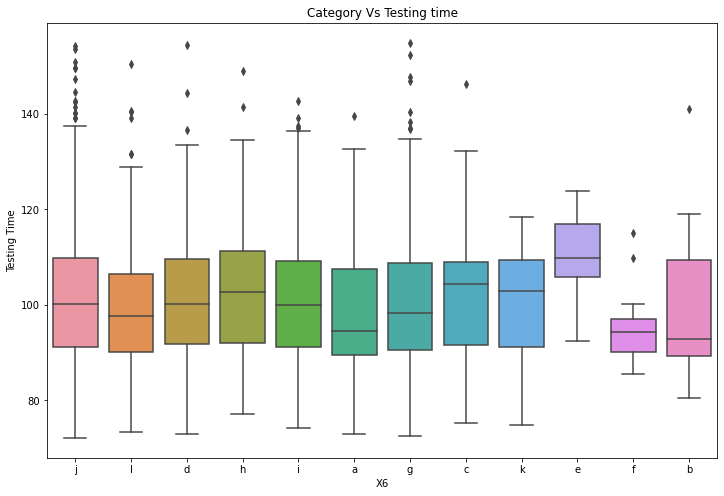

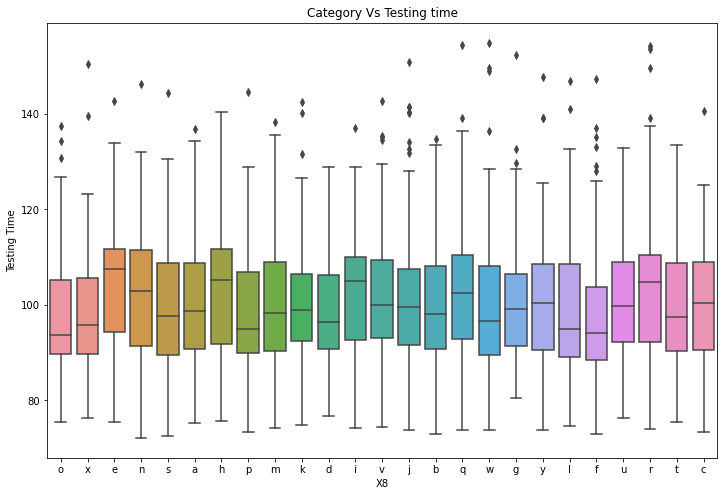

In [17]:
for cat in cat_features:
    plt.figure(figsize=(12,8))
    sns.boxplot(cat_train_data[cat], clean_train['y'])
    plt.title("Category Vs Testing time")
    plt.xlabel(cat)
    plt.ylabel("Testing Time")
    

From these above boxplots for categorical features I can say:
   - We can see after removal of outliers(extreme 'y' values) dataset is looking much cleaner 
   - Features X0,X1,X2,X3,X5,X6,X8 contain some important information as their variance is quite high
   - Feature X4 seems to have very less variance which means it has very less information
   
Hence, I can surely remove X4 from the dataset because of it's low variance(less information)

### 4.1.3.2 Analysis of Binary Features

In [18]:
binary_train_data = clean_train[Binary_features]
print(binary_train_data.shape)
binary_train_data.head()

(4201, 368)


,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Binary features are way more than categorical features in quantity (368), I think it is better to find the variance of all these features and analyze them than visualizing one by one as it will become cumbersome task. So I am finding variances of all the Binary features and will choose the important features based on their variances.

In [19]:
# now calculate variances of all the Binary features and collect them into list with their feature name
var = []
for f in Binary_features:
    v = binary_train_data[f].var()
    var.append((f,v))

# Convert the list of tuples of feature and respective variance into dictionary
var_dict = dict(var)

In [20]:
# Create a dataframe for feature and it's variance
var_df = pd.DataFrame(var_dict.keys(), columns=['feature'])
var_df['variance'] = var_dict.values()
# let's sort the dataframe by variance
var_df

,feature,variance
0,X10,0.013156
1,X11,0.000000
2,X12,0.068971
3,X13,0.054510
4,X14,0.244908
...,...,...
363,X380,0.008030
364,X382,0.007561
365,X383,0.001664
366,X384,0.000476


In [21]:
var_df.describe()

,variance
count,368.000000
mean,0.061796
std,0.080493
min,0.000000
25%,0.003913
50%,0.021880
75%,0.087996
max,0.250040


From above description minimum value of variance is zero and the maximum is 0.250040.
Now I am plotting an scatter plot for above dataframe values so as check their distribution.

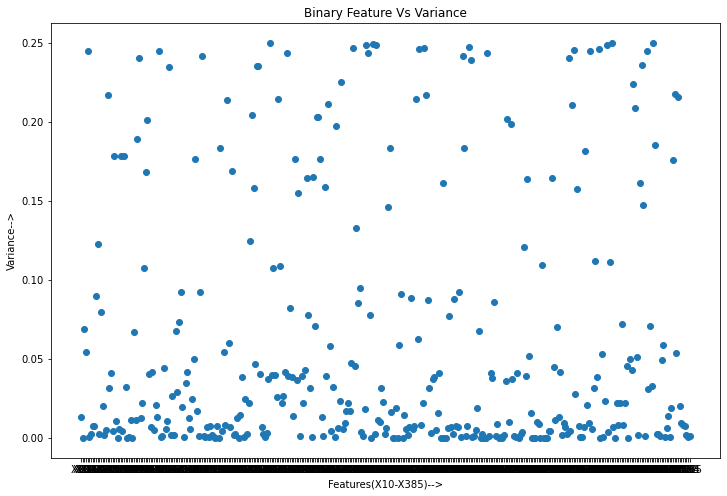

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(var_df['feature'], var_df['variance'])
plt.title("Binary Feature Vs Variance")
plt.xlabel("Features(X10-X385)-->")
plt.ylabel("Variance-->")
plt.show()

- Above scatter plot says there are many values which are having 0 variance.
- Roughly I am also able to see some features with same variance, but it is not clearly visible, I will check it by their exact values.

Now let's check for the features which are having 0 variance and same variance 

In [23]:
# Create dataframe for zero variance features 
zero_var_df = var_df[var_df['variance']==0]
zero_var_df.head()

,feature,variance
1,X11,0.0
81,X93,0.0
95,X107,0.0
217,X233,0.0
219,X235,0.0


In [24]:
print(f"There following {zero_var_df.shape[0]} features having 0 variance:\n")
print(zero_var_df['feature'].values)

There following 13 features having 0 variance:

['X11' 'X93' 'X107' 'X233' 'X235' 'X268' 'X289' 'X290' 'X293' 'X297'
 'X330' 'X339' 'X347']


In [25]:
# create a dataframe which have duplicate values which means same variance features 
same_var_df = var_df[var_df['variance'].duplicated(keep='first').values]
# also remove all the 0 variance 
same_var_df = same_var_df[same_var_df['variance']!=0]
same_var_df.head()

,feature,variance
24,X35,0.178138
26,X37,0.178138
28,X39,0.000238
46,X57,0.013156
64,X76,0.041456


In [26]:
print(f"There following {same_var_df.shape[0]} features having same variance:\n")
print(same_var_df['feature'].values)

There following 53 features having same variance:

['X35' 'X37' 'X39' 'X57' 'X76' 'X84' 'X94' 'X102' 'X113' 'X119' 'X120'
 'X122' 'X130' 'X134' 'X136' 'X146' 'X147' 'X157' 'X172' 'X194' 'X199'
 'X205' 'X213' 'X214' 'X216' 'X222' 'X226' 'X227' 'X232' 'X239' 'X242'
 'X243' 'X244' 'X245' 'X247' 'X248' 'X253' 'X254' 'X262' 'X263' 'X266'
 'X279' 'X296' 'X299' 'X302' 'X320' 'X324' 'X326' 'X360' 'X364' 'X365'
 'X382' 'X385']


- From above analysis of categorical fetaures and Binary features I have come to the conlcusion that I can drop the features which are having zero variance, same variance and the ones with very less variance. Because their low variance will not contribute much for the prediction of testing time while modeling. Now I will collect all the features to be dropped together.


In [27]:
# categorical feature with less variance
cat_drops = ['X4']
# Binary fearures with zero variance
zero_drops = list(zero_var_df['feature'].values)
# Binary features with same variance
same_drops = list(same_var_df['feature'].values)
# combine binary drops
all_binary_drops = zero_drops + same_drops
# concatenate all the features to be dropped
drop_feat = cat_drops + all_binary_drops
print(f"These are the total {len(drop_feat)} features I can drop:\n\n", drop_feat)

These are the total 67 features I can drop:

 ['X4', 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347', 'X35', 'X37', 'X39', 'X57', 'X76', 'X84', 'X94', 'X102', 'X113', 'X119', 'X120', 'X122', 'X130', 'X134', 'X136', 'X146', 'X147', 'X157', 'X172', 'X194', 'X199', 'X205', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X263', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X360', 'X364', 'X365', 'X382', 'X385']


Now let's just find out some important binary by using a random forest model and just perform visual EDA for those features only.

In [28]:
# First drop the non informative binary variables we found above
binary_tr_mod = binary_train_data.drop(all_binary_drops, axis=1)

result_y = clean_train['y']

def get_imp_features(x_data,y_data, top):
    #create a Regressor model
    rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
    # fit the model on data
    rf.fit(x_data, y_data)
    # get the sorted indices of features
    imp_feat_idx = np.argsort(rf.feature_importances_)[::-1]
    # return only top required indices
    return imp_feat_idx[:top]

top_binary_ids = get_imp_features(binary_tr_mod, result_y, 8)

top_binary_feat = binary_tr_mod.T.index[top_binary_ids]

print(f"These are top 8 binary features :\n {list(top_binary_feat)}")

These are top 8 binary features :
 ['X314', 'X315', 'X118', 'X29', 'X54', 'X189', 'X46', 'X127']


Now I have these 8 important binary features from above let's plot a boxplot for all these features.

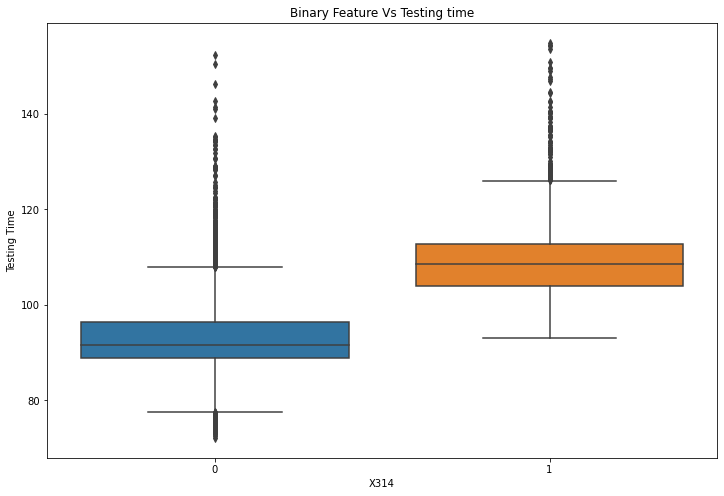

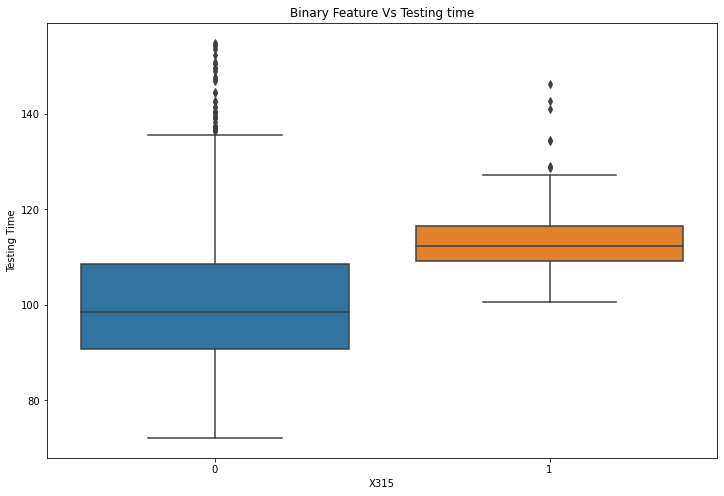

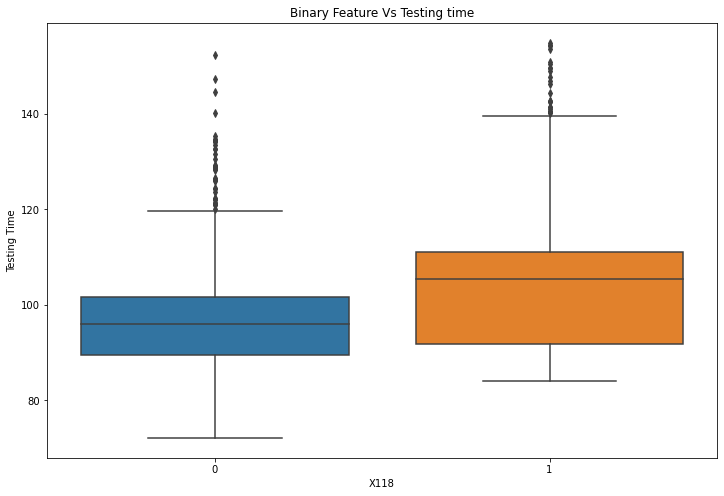

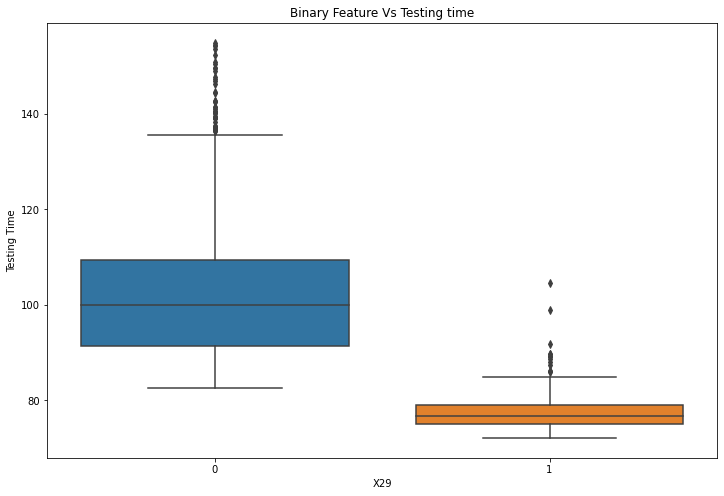

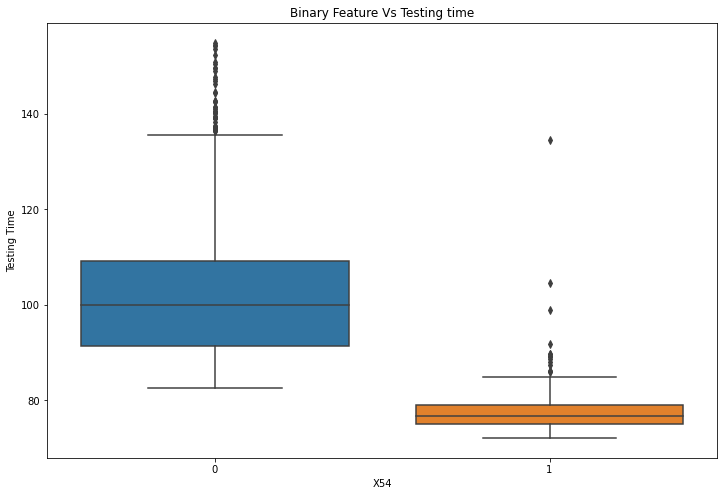

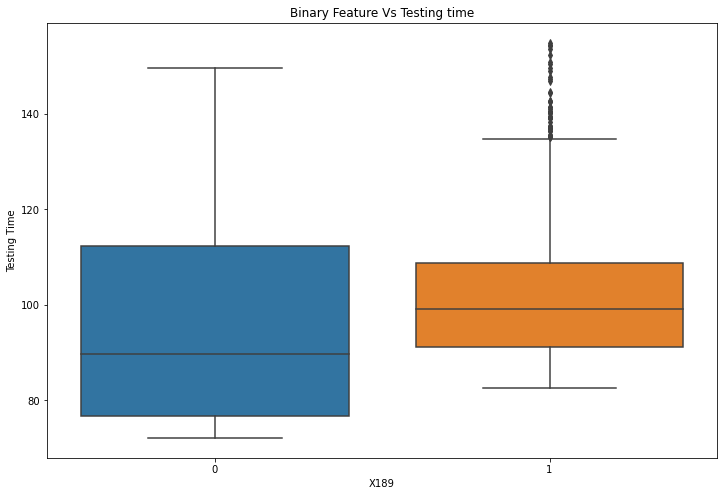

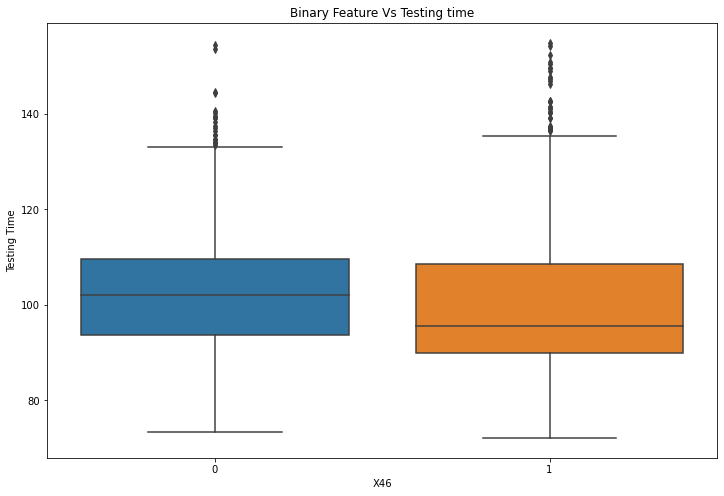

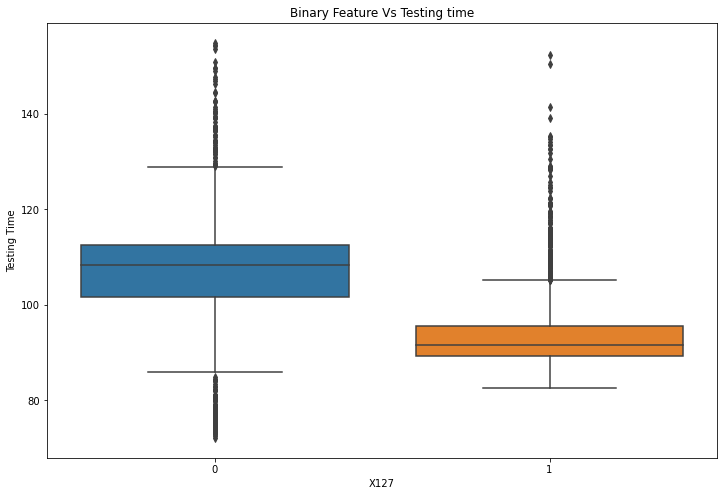

In [29]:
for feat in top_binary_feat:
    plt.figure(figsize=(12,8))
    sns.boxplot(binary_tr_mod[feat], result_y)
    plt.title("Binary Feature Vs Testing time")
    plt.xlabel(feat)
    plt.ylabel("Testing Time")

From above plots I can see these important binary variables are prety well distributed. I can say as the feature's presence or absence is affecting the testing time to change. 
- For features 'X314', 'X315', 'X118',  'X189' when these are present in the car configuration then most of the configurations take more time for testing.
- For features 'X29', 'X54','X127', the configurations which are not having these features are tending to take more testing time.
- For 'X46', the configurations having almost similar testing when it present and also when it is not presnt in the configuration.


### 4.1.3 EDA Summary

- There are No NaN values in the dataset


- There are No duplicate rows in the dataset


- Clipped dependent variable at 155 as threshold time and considered values all above 155 as outliers


- Removed low variance categorical feature:

  ['X4']
  
  
- Removed zero variance binary features:

  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']
  

- Removed same variance binary features: 

  ['X35', 'X37', 'X39', 'X57', 'X76', 'X84', 'X94', 'X102', 'X113', 'X119', 'X120',
 'X122', 'X130', 'X134', 'X136', 'X146', 'X147', 'X157', 'X172', 'X194', 'X199',
 'X205', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242',
 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X263', 'X266',
 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X360', 'X364', 'X365',
 'X382', 'X385']

## 4.2 Data Preprocessing

I am using LabelEncoder for encoding categorical features and Normalizer for normalizing them.

Let's create a function for preprocessing the Categorical features,

In [30]:
def preprocess_categorical(data, IDs):
    """
    data : pandas dataframe
    IDs: ID feature
    return: dataframe, labels
    
    This function takes the dataframe as input, 
    encodes and normalizes the 
    categorical features.
    """
    # create empty lists for collecting feature names
    cat_features = []
    Binary_features = []
    
    # Collect the categorical and binary feature names 
    for f in data.columns:
        if data[f].dtype == 'object':
            cat_features.append(f)
        elif data[f].dtype == 'int' and f != 'ID':
            Binary_features.append(f)
        
    # create categorical feature dataframe
    cat_df = data[cat_features]
    # create binary feature dataframe
    bin_df = data[Binary_features]
    bin_df.insert(0, 'ID', IDs.values)
    
    # Now encode each categorical feature
    for feature in cat_features:
        encoder = LabelEncoder()
        cat_df[feature] = encoder.fit_transform(cat_df[feature].values)
    # normalize the enocded categorical features
    # normalized = Normalizer().fit_transform(cat_df)
    # Create new categorical feature dataframe
    cat_df = pd.DataFrame(cat_df, columns = cat_features)
    cat_df.insert(0, 'ID', IDs.values)
    # Merge binary and categorical dataframes together
    new_data = pd.merge(cat_df, bin_df, on='ID', how='left')
    # return dataframe and labels
    if 'y' in data.columns:
        labels = data['y']
        return new_data, labels
    else:
        return new_data

### 4.2.1 Preprocess Train set

#### Remove Non-informative features from train set

In [31]:
final_train = clean_train.drop(drop_feat, axis=1)
final_train = final_train.drop('ID', axis=1)
train_ID = clean_train['ID'].copy()
print(f"Before removing non informative features:{clean_train.shape}")
print(f"After removing non informative features:{final_train.shape}")
final_train.head()

Before removing non informative features:(4201, 378)
After removing non informative features:(4201, 310)


,y,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,130.81,k,v,at,a,u,j,o,0,0,...,0,0,0,0,1,0,0,0,0,0
1,88.53,k,t,av,e,y,l,o,0,0,...,0,0,1,0,0,0,0,0,0,0
2,76.26,az,w,n,c,x,j,x,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80.62,az,t,n,f,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Encode the training dataset

In [32]:
# get the encoded and normalized categorical features and labels
X_train, y_train= preprocess_categorical(final_train, train_ID)
X_train.head()

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,32,23,17,0,24,9,14,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6,32,21,19,4,28,11,14,0,0,...,0,0,1,0,0,0,0,0,0,0
2,7,20,24,34,2,27,9,23,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,20,21,34,5,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,20,23,34,5,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y_train.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

### 4.2.2 Preprocess Test set

#### Remove Non-informative features from test set

In [34]:
final_test = test.drop(drop_feat, axis=1)
final_test = final_test.drop('ID', axis=1)
test_ID = test['ID'].copy()
print(f"Before removing non informative features:{test.shape}")
print(f"After removing non informative features:{final_test.shape}")
final_test.head()

Before removing non informative features:(4209, 377)
After removing non informative features:(4209, 309)


,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,az,v,n,f,t,a,w,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,t,b,ai,a,b,g,y,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,az,v,as,f,a,j,j,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,az,l,n,f,z,l,n,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,w,s,as,c,y,i,m,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Encode the testing dataset

In [35]:
# get the encoded and normalized categorical features
X_test = preprocess_categorical(final_test, test_ID)
X_test.head()

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,1,21,23,34,5,26,0,22,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,42,3,8,0,9,6,24,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,21,23,17,5,0,9,9,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,21,13,34,5,31,11,13,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,45,20,17,2,30,8,12,0,0,...,0,0,1,0,0,0,0,0,0,0


# 5. Feature Engineering

In this section I am going to create new features like PCA, SVD, Feature Interactions.

Now we have X_train and X_test data, let's split train set into train and cross validation set first, then I will add new features

## 5.1 Original set

In [36]:
X_train, y_train = preprocess_categorical(final_train, train_ID)
X_train = X_train.drop('ID', axis=1)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_test = preprocess_categorical(final_test, test_ID)
X_test = X_test.drop('ID', axis=1)

print("Train set:")
print(X_train.shape)
print(y_train.shape)
print("CV set:")
print(X_cv.shape)
print(y_cv.shape)
print("Test set:")
print(X_test.shape)

Train set:
(3360, 309)
(3360,)
CV set:
(841, 309)
(841,)
Test set:
(4209, 309)


## 5.2 PCA
PCA of binary features

In [47]:
# lets take top 10 pca components
components = 10 
categories = ['X0','X1', 'X2', 'X3', 'X5','X6', 'X8']

pca = PCA(n_components=components, random_state=420)

pca_train = pca.fit_transform(X_train.drop(categories, axis=1))
pca_cv = pca.transform(X_cv.drop(categories, axis=1))
pca_test = pca.transform(X_test.drop(categories, axis=1))

print(pca_train.shape)
print(pca_cv.shape)
print(pca_test.shape)

(3360, 10)
(841, 10)
(4209, 10)


## 5.3 SVD

Recent work by Gavish and Donoho provides an optimal truncation value, or hard threshold, under certain conditions,
providing a principled approach to obtaining low-rank matrix approximations using the SVD.

It determines the optimal hard threshold **'τ'** for
singular value truncation under the assumption that a matrix has a low-rank
structure contaminated with Gaussian white noise. This work builds on a
significant literature surrounding various techniques for hard thresholding of singular values.

If X ∈ R^n×m is rectangular and m < n, then the aspect ratio 

β = m/n

When noise is unknown there is no closed-form solution for **'τ'** , and it must be approximated
numerically,

For unknown noise, and a rectangular matrix X ∈ R^n×m, the optimal hard threshold is given by:

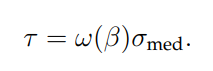

σmed is the median singular value

Here, ω(β) = λ(β)/µβ, where µβ is the solution to the following problem:
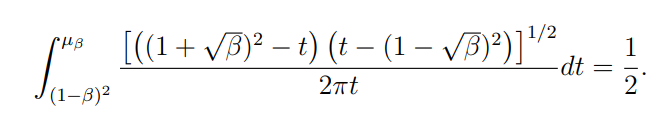

The median µβ and hence the coefficient ω(β) are not
available analytically; 

Some values of coefficient ω(β) are tabulated in
Table below for convenience.

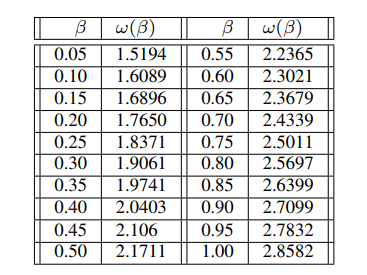


Now let's find out the Hard Threshold using above method

In [42]:
# get the matrix factors
categories = ['X0','X1', 'X2', 'X3', 'X5','X6', 'X8']
U, S, VT = np.linalg.svd(X_train.drop(categories, axis=1),full_matrices=1)
# calculate the aspect ratio β
m = X_train.drop(categories, axis=1).shape[1]
n = X_train.drop(categories, axis=1).shape[0]
β = m/n
β

0.08988095238095238

In [43]:
# 0.08988095238095238 near 0.10
# hence let's take w(β) value for β = 0.10 from the above table
ω_β = 1.6089
# find the median singular value
ymed = np.median(S)
# find Hard threshold
cutoff = ω_β * ymed 
print(f"The Hard Threshold for Truncation = {cutoff}")
# get the number of components
r = np.max(np.where(S > cutoff))
print(f"Number of total components to be selected = {r}")

The Hard Threshold for Truncation = 5.349072242419465
Number of total components to be selected = 117


Now by using above value for number of components add SVD feature

SVD of binary features

In [44]:
n_comp = r
categories = ['X0','X1', 'X2', 'X3', 'X5','X6', 'X8']

tsvd = TruncatedSVD(n_components=r, random_state=420)

svd_train = tsvd.fit_transform(X_train.drop(categories, axis=1))
svd_cv = tsvd.transform(X_cv.drop(categories, axis=1))
svd_test = tsvd.transform(X_test.drop(categories, axis=1))

print(svd_train.shape)
print(svd_cv.shape)
print(svd_test.shape)

(3360, 117)
(841, 117)
(4209, 117)


# 5. Machine Learning Models 

## 5.1 KNeighborsRegressor
### I will use the only original dataset for this model

In [57]:
import time
start = time.time()
leaf_sizes = list(range(1,50))
neighbors = list(range(1,30))
norms=[1,2]
# create parameters dictionary
parameters = {'leaf_size':leaf_sizes, 'n_neighbors':neighbors, 'p':norms}
#Create a KNN Regressor model
knn = KNeighborsRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor = RandomizedSearchCV(knn, param_distributions=parameters, verbose=10, n_jobs=-1)
#Fit the model
best_regressor = regressor.fit(X_train, y_train)
# get the best parameters
best_K = best_regressor.best_estimator_.get_params()['n_neighbors']
best_leaf_size = best_regressor.best_estimator_.get_params()['leaf_size']
norm = best_regressor.best_estimator_.get_params()['p']
#Print The best parameters
print('Best K:', best_K)
print('Best leaf_size=', best_leaf_size)
print('Best norm:', norm)
elapsed = time.time() - start
print(f"Time elapsed: {elapsed}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.2s


Best K: 13
Best leaf_size= 41
Best norm: 1
Time elapsed: 12.097684621810913


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.9s finished


In [58]:
# lets use best parameters found above
knn = KNeighborsRegressor(n_neighbors=best_K, leaf_size=best_leaf_size, p=norm)

knn.fit(X_train, y_train)
pred_train = knn.predict(X_train)
train_score = r2_score(y_train, pred_train)
print(f"For K={best_K}, Train R2 = {train_score}")
pred_cv = knn.predict(X_cv)
cv_score = r2_score(y_cv, pred_cv)
print(f"For K={best_K}, CV R2 = {cv_score}")

For K=13, Train R2 = 0.581966843169116
For K=13, CV R2 = 0.4738065919984832


In [59]:
X_full_train = np.vstack((X_train, X_cv))
y_full_train = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))
knn.fit(X_full_train, y_full_train)

KNeighborsRegressor(leaf_size=41, n_neighbors=13, p=1)

In [60]:
filename = 'KNN_Original_feat_model.sav'
knn = joblib.dump(knn, filename)
print(f'Saved {filename}')

Saved KNN_Original_feat_model.sav


In [61]:
filename = 'KNN_Original_feat_model.sav'
knn = joblib.load(filename)
print(f'Loaded {filename}')

Loaded KNN_Original_feat_model.sav


In [64]:
pred_train = knn.predict(X_full_train)
train_score = r2_score(y_full_train, pred_train)
print(f"For K={best_K}, Train R2 = {train_score}")

For K=13, Train R2 = 0.5817266349749117


In [65]:
pred_test = knn.predict(X_test)
submission_knn = pd.read_csv('sample_submission.csv')
submission_knn['y'] = pred_test
submission_knn.to_csv(f'sample_submission_knn={best_K}.csv', index=False)
submission_knn.head()

,ID,y
0,1,77.979231
1,2,93.309231
2,3,78.286154
3,4,77.040000
4,5,111.300769


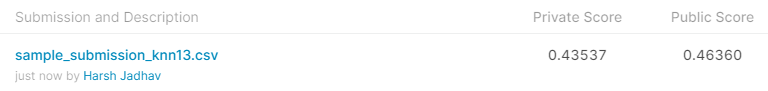

- Train R2 = 0.5817266349749117
- Test Private R2 = 0.43537
- Test Public R2 = 0.46360


Here KNeighborsRegressor() with K=13 is overfitting on the original dataset because we are getting low R^2 value for both cross validation and testing set than training set.
But one thing to notice is having a cross validation set is good choice as I can trust the cross validation results before doing testing.

## 5.2 Decision Tree Regressor

### 5.2.1 With Original Dataset

In [66]:
import time
start = time.time()
depth = [1, 5, 10, 50, 100, 500, 1000]
# create parameters dictionary
parameters = {'max_depth' : depth}
#Create a Decision Tree Regressor model
dtr = DecisionTreeRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor = RandomizedSearchCV(dtr, param_distributions=parameters, verbose=10, n_jobs=-1)
#Fit the model
best_regressor = regressor.fit(X_train, y_train)
# get the best parameters
best_max_depth = best_regressor.best_estimator_.get_params()['max_depth']

#Print The best parameters
print('Best max_depth:', best_max_depth)
elapsed = time.time() - start
print(f"Time elapsed: {elapsed}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s


Best max_depth: 5
Time elapsed: 2.031101703643799


[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.9s finished


In [67]:
# lets use best parameters found above
dtr1 = DecisionTreeRegressor(max_depth=best_max_depth)
dtr1.fit(X_train, y_train)
pred_train = dtr1.predict(X_train)
train_score = r2_score(y_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = dtr1.predict(X_cv)
cv_score = r2_score(y_cv, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=5, Train R2 = 0.6339722490371381
For max_depth=5, CV R2 = 0.586507102894404


In [68]:
X_full_train = np.vstack((X_train, X_cv))
y_full_train = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))
dtr1 = DecisionTreeRegressor(max_depth=best_max_depth)
dtr1.fit(X_full_train, y_full_train)

DecisionTreeRegressor(max_depth=5)

In [71]:
filename = 'DTR_Original_feat_model.sav'
dtr1 = joblib.dump(dtr1, filename)
print(f'Saved {filename}')

Saved DTR_Original_feat_model.sav


In [72]:
filename = 'DTR_Original_feat_model.sav'
dtr1 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded DTR_Original_feat_model.sav


In [73]:
pred_train = dtr1.predict(X_full_train)
train_score = r2_score(y_full_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")

For max_depth=5, Train R2 = 0.6312890285381911


In [74]:
pred_test = dtr1.predict(X_test)
submission_DTR = pd.read_csv('sample_submission.csv')
submission_DTR['y'] = pred_test
submission_DTR.to_csv(f'sample_submission_DTR={best_max_depth}.csv', index=False)
submission_DTR.head()

,ID,y
0,1,77.659766
1,2,130.810000
2,3,77.659766
3,4,77.659766
4,5,110.368405


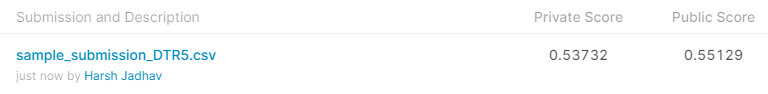

- Train R2 = 0.6312890285381911
- Test Private R2 = 0.53732
- Test Public R2 = 0.55129

### 5.2.2 With Original Dataset + PCA + SVD

In [75]:
train_svd_pca = np.hstack((X_train, pca_train, svd_train))
cv_svd_pca = np.hstack((X_cv, pca_cv, svd_cv))
test_svd_pca = np.hstack((X_test, pca_test, svd_test))

print(train_svd_pca.shape)
print(cv_svd_pca.shape)
print(test_svd_pca.shape)

(3360, 436)
(841, 436)
(4209, 436)


In [76]:
import time
start = time.time()
depth = [1, 3, 5, 10, 50, 100, 500, 1000]

# create parameters dictionary
parameters = {'max_depth' : depth}
#Create a Decision Tree Regressor model
dtr = DecisionTreeRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor = RandomizedSearchCV(dtr, param_distributions=parameters, verbose=10, n_jobs=-1)
#Fit the model
best_regressor = regressor.fit(train_svd_pca, y_train)
# get the best parameters
best_max_depth = best_regressor.best_estimator_.get_params()['max_depth']

#Print The best parameters
print('Best max_depth:', best_max_depth)
elapsed = time.time() - start
print(f"Time elapsed: {elapsed}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    6.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.5s finished


Best max_depth: 3
Time elapsed: 6.751556634902954


In [77]:
# lets use best parameters found above
dtr2 = DecisionTreeRegressor(max_depth=best_max_depth)
dtr2.fit(train_svd_pca, y_train)
pred_train = dtr2.predict(train_svd_pca)
train_score = r2_score(y_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = dtr2.predict(cv_svd_pca)
cv_score = r2_score(y_cv, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=3, Train R2 = 0.6197223844385611
For max_depth=3, CV R2 = 0.5965378027870976


In [78]:
X_full_train_svd_pca = np.vstack((train_svd_pca, cv_svd_pca))
y_full_train = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))
dtr2 = DecisionTreeRegressor(max_depth=best_max_depth)
dtr2.fit(X_full_train_svd_pca, y_full_train)

DecisionTreeRegressor(max_depth=3)

In [79]:
filename = 'DTR_svd_pca_model.sav'
dtr2 = joblib.dump(dtr2, filename)
print(f'Saved {filename}')

Saved DTR_svd_pca_model.sav


In [80]:
filename = 'DTR_svd_pca_model.sav'
dtr2 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded DTR_svd_pca_model.sav


In [81]:
pred_train = dtr2.predict(X_full_train_svd_pca)
train_score = r2_score(y_full_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")

For max_depth=3, Train R2 = 0.6155964859539103


In [82]:
pred_test = dtr2.predict(test_svd_pca)
submission_DTR = pd.read_csv('sample_submission.csv')
submission_DTR['y'] = pred_test
submission_DTR.to_csv(f'sample_submission_DTR_svd_pca_={best_max_depth}.csv', index=False)
submission_DTR.head()

,ID,y
0,1,77.964862
1,2,94.044258
2,3,77.964862
3,4,77.964862
4,5,112.319644


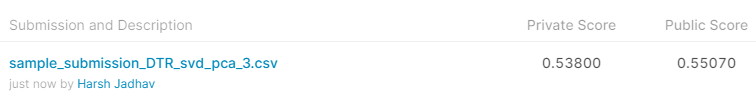

- Train R2 = 0.6155964859539103
- Test Private R2 = 0.53800
- Test Public R2 = 0.55070

This model is not performing that well but improved from KnearestRegressor() , let's try another model

# 5.3 Random Forest Regressor

## 5.3.1 With Original Dataset

In [112]:
import time
start = time.time()

# Number of trees in random forest
n_estimators = [10, 25, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 10, 15, 20, 25, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor = RandomizedSearchCV(rf, param_distributions=parameters, verbose=10, n_jobs=-1)
#Fit the model
best_regressor = regressor.fit(X_train, y_train)
# get the best parameters
best_max_depth = best_regressor.best_estimator_.get_params()['max_depth']
best_n_estimators = best_regressor.best_estimator_.get_params()['n_estimators']
best_max_features = best_regressor.best_estimator_.get_params()['max_features']
best_min_samples_split = best_regressor.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf = best_regressor.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best max_features:', best_max_features)
print('Best min_samples_split:', best_min_samples_split)
print('Best min_samples_leaf:', best_min_samples_leaf)

elapsed = time.time() - start
print(f"Time elapsed: {elapsed}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1685s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (18.7115s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Best max_depth: 5
Best n_estimators: 300
Best max_features: auto
Best min_samples_split: 100
Best min_samples_leaf: 2
Time elapsed: 78.28886032104492


In [113]:
rf1 = RandomForestRegressor(n_estimators=best_n_estimators,
               max_features=best_max_features,
               max_depth=best_max_depth,
               min_samples_split=best_min_samples_split,
               min_samples_leaf= best_min_samples_leaf)
rf1.fit(X_train, y_train)

pred_train = rf1.predict(X_train)
train_score = r2_score(y_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = rf1.predict(X_cv)
cv_score = r2_score(y_cv, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=5, Train R2 = 0.6339065646994739
For max_depth=5, CV R2 = 0.6022516771441269


In [114]:
X_full_train = np.vstack((X_train, X_cv))
y_full_train = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

rf1 = RandomForestRegressor(n_estimators=best_n_estimators,
               max_features=best_max_features,
               max_depth=best_max_depth,
               min_samples_split=best_min_samples_split,
               min_samples_leaf= best_min_samples_leaf)
rf1.fit(X_full_train, y_full_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=100,
                      n_estimators=300)

In [115]:
filename = 'RF_Orig_Feat_model.sav'
joblib.dump(rf1, filename)
print(f'Saved {filename}')

Saved RF_Orig_Feat_model.sav


In [116]:
filename = 'RF_Orig_Feat_model.sav'
rf1 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded RF_Orig_Feat_model.sav


In [117]:
pred_train = rf1.predict(X_full_train)
train_score = r2_score(y_full_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")

For max_depth=5, Train R2 = 0.6290333793346686


In [118]:
pred_test = rf1.predict(X_test)
submission_DTR = pd.read_csv('sample_submission.csv')
submission_DTR['y'] = pred_test
submission_DTR.to_csv(f'sample_submission_RF={best_max_depth}.csv', index=False)
submission_DTR.head()

,ID,y
0,1,77.785880
1,2,93.986622
2,3,78.122525
3,4,77.586624
4,5,111.673830


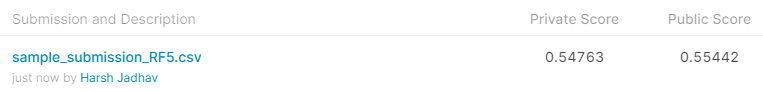

- Train R2 = 0.6290333793346686
- Test Private R2 = 0.54763
- Test Public R2 = 0.55442

### 5.3.2 With Original Dataset + PCA + SVD

In [119]:
train_svd_pca = np.hstack((X_train, pca_train, svd_train))
cv_svd_pca = np.hstack((X_cv, pca_cv, svd_cv))
test_svd_pca = np.hstack((X_test, pca_test, svd_test))

print(train_svd_pca.shape)
print(cv_svd_pca.shape)
print(test_svd_pca.shape)

(3360, 436)
(841, 436)
(4209, 436)


In [133]:
import time
start = time.time()

# Number of trees in random forest
n_estimators = [10, 25, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 10, 15, 20, 25, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 5, 10]

# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor = RandomizedSearchCV(rf, param_distributions=parameters, verbose=10, n_jobs=-1)
#Fit the model
best_regressor = regressor.fit(train_svd_pca, y_train)
# get the best parameters
best_max_depth = best_regressor.best_estimator_.get_params()['max_depth']
best_n_estimators = best_regressor.best_estimator_.get_params()['n_estimators']
best_max_features = best_regressor.best_estimator_.get_params()['max_features']
best_min_samples_split = best_regressor.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf = best_regressor.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best max_features:', best_max_features)
print('Best min_samples_split:', best_min_samples_split)
print('Best min_samples_leaf:', best_min_samples_leaf)

elapsed = time.time() - start
print(f"Time elapsed: {elapsed}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.9min finished


Best max_depth: 5
Best n_estimators: 500
Best max_features: auto
Best min_samples_split: 100
Best min_samples_leaf: 10
Time elapsed: 290.3807260990143


In [134]:
rf2 = RandomForestRegressor(n_estimators = best_n_estimators,
               max_features = best_max_features,
               max_depth = best_max_depth,
               min_samples_split = best_min_samples_split,
               min_samples_leaf = best_min_samples_leaf)
rf2.fit(train_svd_pca, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=100,
                      n_estimators=500)

In [135]:
pred_train = rf2.predict(train_svd_pca)
train_score = r2_score(y_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = rf2.predict(cv_svd_pca)
cv_score = r2_score(y_cv, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=5, Train R2 = 0.640813585100622
For max_depth=5, CV R2 = 0.597953780763185


In [136]:
X_full_train_svd_pca = np.vstack((train_svd_pca, cv_svd_pca))
y_full_train = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

rf2 = RandomForestRegressor(n_estimators = best_n_estimators,
               max_features = best_max_features,
               max_depth = best_max_depth,
               min_samples_split = best_min_samples_split,
               min_samples_leaf = best_min_samples_leaf)
rf2.fit(X_full_train_svd_pca, y_full_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=100,
                      n_estimators=500)

In [137]:
filename = 'RF_PCA_SVD_model.sav'
joblib.dump(rf2, filename)
print(f'Saved {filename}')

Saved RF_PCA_SVD_model.sav


In [138]:
filename = 'RF_PCA_SVD_model.sav'
rf2 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded RF_PCA_SVD_model.sav


In [139]:
pred_train = rf2.predict(X_full_train_svd_pca)
train_score = r2_score(y_full_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")

For max_depth=5, Train R2 = 0.6364927215350347


In [140]:
pred_test = rf2.predict(test_svd_pca)
submission_RF = pd.read_csv('sample_submission.csv')
submission_RF['y'] = pred_test
submission_RF.to_csv(f'sample_submission_RF_SVD_PCA={best_max_depth}.csv', index=False)
submission_RF.head()

,ID,y
0,1,77.648774
1,2,93.867920
2,3,77.561921
3,4,77.729999
4,5,111.977759


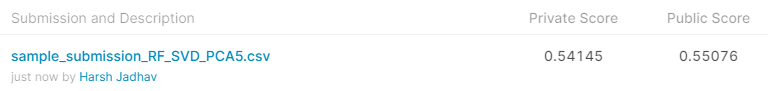

- Train R2 = 0.6364927215350347
- Test Private R2 = 0.54145
- Test Public R2 = 0.55076

# 5.4 Add some more features

### 5.4.1 Interactions
- Two way interactions X314, X315
- Three way interactions X118,X314,X315

https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700

In [141]:
def get_interactions(features):
    """
    features : list of features
    return : interaction between features
    """
    train_inter = 0
    cv_inter = 0
    test_inter = 0
    for f in range(len(features)):
        train_inter += X_train[features[f]].values
        cv_inter += X_cv[features[f]].values
        test_inter += X_test[features[f]].values
        
    return train_inter.reshape(-1,1), cv_inter.reshape(-1,1), test_inter.reshape(-1,1)

train_X314_X315, cv_X314_X315, test_X314_X315 = get_interactions(['X314', 'X315'])
train_X118_X314_X315, cv_X118_X314_X315, test_X118_X314_X315 = get_interactions(['X118', 'X314', 
                                                                                 'X315'])

In [142]:
print(train_X314_X315.shape)
print(cv_X314_X315.shape)
print(test_X314_X315.shape)
print(train_X118_X314_X315.shape)
print(cv_X118_X314_X315.shape)
print(test_X118_X314_X315.shape)

(3360, 1)
(841, 1)
(4209, 1)
(3360, 1)
(841, 1)
(4209, 1)


### 5.4.2 Gaussian Random Projections

In [143]:
# Gaussian Random Projection
n_comp = 10
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_train = grp.fit_transform(X_train)
grp_cv = grp.transform(X_cv)
grp_test = grp.transform(X_test)

print(grp_train.shape)
print(grp_cv.shape)
print(grp_test.shape)

(3360, 10)
(841, 10)
(4209, 10)


## 5.4.3 Random Forest Regressor
With Original, PCA, SVD, GRP, Interactions

In [176]:
train_grp_pca_svd_inter = np.hstack((X_train, pca_train, grp_train, svd_train, train_X314_X315, 
                                     train_X118_X314_X315))
cv_grp_pca_svd_inter = np.hstack((X_cv, pca_cv, grp_cv, svd_cv, cv_X314_X315, 
                                  cv_X118_X314_X315))
test_grp_pca_svd_inter = np.hstack((X_test, pca_test, grp_test, svd_test, test_X314_X315, 
                                    test_X118_X314_X315))

print(train_grp_pca_svd_inter.shape) 
print(cv_grp_pca_svd_inter.shape)
print(test_grp_pca_svd_inter.shape)

(3360, 448)
(841, 448)
(4209, 448)


In [177]:
import time
start = time.time()

# Number of trees in random forest
n_estimators = [10, 25, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 3, 5, 10, 15, 20, 25]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15, 25]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 5, 10]

# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor = RandomizedSearchCV(rf, param_distributions=parameters, verbose=10, n_jobs=-1)
#Fit the model
best_regressor = regressor.fit(train_grp_pca_svd_inter, y_train)
# get the best parameters
best_max_depth = best_regressor.best_estimator_.get_params()['max_depth']
best_n_estimators = best_regressor.best_estimator_.get_params()['n_estimators']
best_max_features = best_regressor.best_estimator_.get_params()['max_features']
best_min_samples_split = best_regressor.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf = best_regressor.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best max_features:', best_max_features)
print('Best min_samples_split:', best_min_samples_split)
print('Best min_samples_leaf:', best_min_samples_leaf)

elapsed = time.time() - start
print(f"Time elapsed: {elapsed}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.5min finished


Best max_depth: 5
Best n_estimators: 500
Best max_features: auto
Best min_samples_split: 5
Best min_samples_leaf: 3
Time elapsed: 390.1909713745117


In [178]:
rf3 = RandomForestRegressor(n_estimators = best_n_estimators,
               max_features = best_max_features,
               max_depth = best_max_depth,
               min_samples_split = best_min_samples_split,
               min_samples_leaf = best_min_samples_leaf)
rf3.fit(train_grp_pca_svd_inter, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=500)

In [179]:
pred_train = rf3.predict(train_grp_pca_svd_inter)
train_score = r2_score(y_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = rf3.predict(cv_grp_pca_svd_inter)
cv_score = r2_score(y_cv, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=5, Train R2 = 0.6620651156983793
For max_depth=5, CV R2 = 0.5936390916556575


In [180]:
X_full_train_grp_pca_svd_inter = np.vstack((train_grp_pca_svd_inter, cv_grp_pca_svd_inter))
y_full_train = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

rf3 = RandomForestRegressor(n_estimators = best_n_estimators,
               max_features = best_max_features,
               max_depth = best_max_depth,
               min_samples_split = best_min_samples_split,
               min_samples_leaf = best_min_samples_leaf)
rf3.fit(X_full_train_grp_pca_svd_inter, y_full_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=500)

In [181]:
filename = 'RF_PCA_SVD_inter_GPR_model.sav'
joblib.dump(rf3, filename)
print(f'Saved {filename}')

Saved RF_PCA_SVD_inter_GPR_model.sav


In [182]:
filename = 'RF_PCA_SVD_inter_GPR_model.sav'
rf3 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded RF_PCA_SVD_inter_GPR_model.sav


In [183]:
pred_train = rf3.predict(X_full_train_grp_pca_svd_inter)
train_score = r2_score(y_full_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")

For max_depth=5, Train R2 = 0.6527769059803106


In [184]:
pred_test = rf3.predict(test_grp_pca_svd_inter)
submission_RF = pd.read_csv('sample_submission.csv')
submission_RF['y'] = pred_test
submission_RF.to_csv(f'sample_submission_RF_PCA_SVD_inter_GPR={best_max_depth}.csv', index=False)
submission_RF.head()

,ID,y
0,1,78.908862
1,2,93.734419
2,3,78.876308
3,4,77.709303
4,5,112.009775


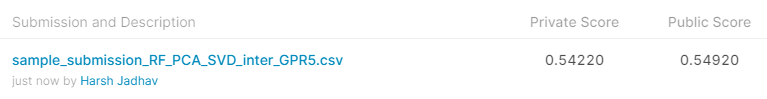

- Train R2 = 0.6527769059803106
- Test Private R2 = 0.54220
- Test Public R2 = 0.54920

## 5.4.4 XGBoost Regressor
With Original, PCA, SVD, GRP, Interactions

In [190]:
train_grp_pca_svd_inter = np.hstack((X_train, pca_train, grp_train, svd_train, train_X314_X315, 
                                     train_X118_X314_X315))
cv_grp_pca_svd_inter = np.hstack((X_cv, pca_cv, grp_cv, svd_cv, cv_X314_X315, 
                                  cv_X118_X314_X315))
test_grp_pca_svd_inter = np.hstack((X_test, pca_test, grp_test, svd_test, test_X314_X315, 
                                    test_X118_X314_X315))

print(train_grp_pca_svd_inter.shape)
print(cv_grp_pca_svd_inter.shape)
print(test_grp_pca_svd_inter.shape)

(3360, 448)
(841, 448)
(4209, 448)


In [207]:
neigh=XGBRegressor(random_state=42, n_jobs=-1) 
parameters = {'learning_rate':[0.001,0.01,0.05,0.1,1], 
              'n_estimators':[100,150,200,500], 
              'max_depth':[2,3,5,10], 
              'colsample_bytree':[0.1,0.5,0.7,1], 
              'subsample':[0.2,0.3,0.5,1], 
              'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],             
              'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]} 

reg=RandomizedSearchCV(neigh,parameters,cv=5, scoring='r2', return_train_score=True, n_jobs=-1,
                       verbose=10) 
reg.fit(train_grp_pca_svd_inter, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_jobs=-1,
                   param_distribu

In [208]:
best_max_depth = reg.best_estimator_.get_params()['max_depth']
best_n_estimators = reg.best_estimator_.get_params()['n_estimators']
best_colsample_bytree = reg.best_estimator_.get_params()['colsample_bytree']
best_subsample = reg.best_estimator_.get_params()['subsample']
best_gamma = reg.best_estimator_.get_params()['gamma']
best_reg_alpha = reg.best_estimator_.get_params()['reg_alpha']
best_learning_rate = reg.best_estimator_.get_params()['learning_rate']
#Print The best parameters
print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best colsample_bytree:', best_colsample_bytree)
print('Best subsample:', best_subsample)
print('Best reg_alpha:', best_reg_alpha)
print('Best gamma:', best_gamma)
print('Best learning_rate:', best_learning_rate)

Best max_depth: 2
Best n_estimators: 100
Best colsample_bytree: 1
Best subsample: 1
Best reg_alpha: 10.0
Best gamma: 0
Best learning_rate: 0.1


In [209]:
xgb = XGBRegressor(n_estimators = best_n_estimators,
               learning_rate = best_learning_rate,
               max_depth = best_max_depth,
               subsample = best_subsample,
               gamma = best_gamma,
               reg_alpha = best_reg_alpha,
                colsample_bytree = best_colsample_bytree,
                  random_state=42,n_jobs=-1)
xgb.fit(train_grp_pca_svd_inter, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=10.0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [210]:
pred_train = xgb.predict(train_grp_pca_svd_inter)
train_score = r2_score(y_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")
pred_cv = xgb.predict(cv_grp_pca_svd_inter)
cv_score = r2_score(y_cv, pred_cv)
print(f"For max_depth={best_max_depth}, CV R2 = {cv_score}")

For max_depth=2, Train R2 = 0.6670327858950802
For max_depth=2, CV R2 = 0.5965159762242921


In [211]:
X_full_train_grp_pca_svd_inter = np.vstack((train_grp_pca_svd_inter, cv_grp_pca_svd_inter))
y_full_train = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

xgb = XGBRegressor(n_estimators = best_n_estimators,
               learning_rate = best_learning_rate,
               max_depth = best_max_depth,
               subsample = best_subsample,
               gamma = best_gamma,
               reg_alpha = best_reg_alpha,
                colsample_bytree = best_colsample_bytree,
                  random_state=42,n_jobs=-1)
xgb.fit(X_full_train_grp_pca_svd_inter, y_full_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=10.0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
filename = 'XGB_PCA_SVD_inter_GPR_model.sav'
joblib.dump(xgb, filename)
print(f'Saved {filename}')

Saved XGB_PCA_SVD_inter_GPR_model.sav


In [213]:
filename = 'XGB_PCA_SVD_inter_GPR_model.sav'
xgb = joblib.load(filename)
print(f'Loaded {filename}')

Loaded XGB_PCA_SVD_inter_GPR_model.sav


In [214]:
pred_train = xgb.predict(X_full_train_grp_pca_svd_inter)
train_score = r2_score(y_full_train, pred_train)
print(f"For max_depth={best_max_depth}, Train R2 = {train_score}")

For max_depth=2, Train R2 = 0.6551805553802594


In [215]:
pred_test = xgb.predict(test_grp_pca_svd_inter)
submission_xgb = pd.read_csv('sample_submission.csv')
submission_xgb['y'] = pred_test
submission_xgb.to_csv(f'sample_submission_xgb_SVD_PCA_inter_GPR={best_max_depth}.csv', index=False)
submission_xgb.head()

,ID,y
0,1,78.033203
1,2,94.560959
2,3,78.009758
3,4,77.881721
4,5,110.964104


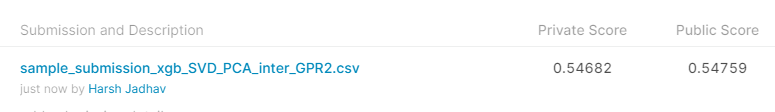

- Train R2 = 0.6551805553802594
- Test Private R2 = 0.54682
- Test Public R2 = 0.54759

## 5.4.5 Stacking Regressor
With Original, PCA, SVD, GRP, Interactions

In [216]:
filename = 'RF_Orig_Feat_model.sav'
rf1 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded RF_Orig_Feat_model.sav


In [217]:
filename = 'RF_PCA_SVD_inter_GPR_model.sav'
rf2 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded RF_PCA_SVD_inter_GPR_model.sav


In [218]:
filename = 'RF_PCA_SVD_model.sav'
rf3 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded RF_PCA_SVD_model.sav


In [219]:
filename = 'XGB_PCA_SVD_inter_GPR_model.sav'
xgb = joblib.load(filename)
print(f'Loaded {filename}')

Loaded XGB_PCA_SVD_inter_GPR_model.sav


In [220]:
filename = 'DTR_svd_pca_model.sav'
dtr2 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded DTR_svd_pca_model.sav


In [222]:
# lets take top 10 pca components
components = 10

pca = PCA(n_components=components, random_state=420)

pca_train = pca.fit_transform(X_train)
pca_cv = pca.transform(X_cv)
pca_test = pca.transform(X_test)

print(pca_train.shape)
print(pca_cv.shape)
print(pca_test.shape)

(3360, 10)
(841, 10)
(4209, 10)


In [242]:
train_grp_pca_svd_inter = np.hstack((X_train, pca_train, grp_train, svd_train, train_X314_X315, 
                                     train_X118_X314_X315))
cv_grp_pca_svd_inter = np.hstack((X_cv, pca_cv, grp_cv, svd_cv, cv_X314_X315, 
                                  cv_X118_X314_X315))
test_grp_pca_svd_inter = np.hstack((X_test, pca_test, grp_test, svd_test, test_X314_X315, 
                                    test_X118_X314_X315))

print(train_grp_pca_svd_inter.shape)
print(cv_grp_pca_svd_inter.shape)
print(test_grp_pca_svd_inter.shape)

(3360, 448)
(841, 448)
(4209, 448)


In [243]:
ridge_reg =  Ridge(random_state=42, fit_intercept=False, alpha=0)
stacked_model = StackingCVRegressor(regressors=(rf1, rf2, rf3, xgb),                           
                                        meta_regressor=ridge_reg,                            
                                        use_features_in_secondary = False, refit=True, cv=5) 
# cv_score=cross_val_score(stacked, train_grp_pca_svd_inter, y_train,
#                          scoring='r2',cv= 5,verbose= 5,n_jobs=-1) 
# print('Mean Score:',cv_score.mean()) 
# print('Standard Deviation:',cv_score.std()) 
stacked_model.fit(train_grp_pca_svd_inter, y_train)

StackingCVRegressor(meta_regressor=Ridge(alpha=0, fit_intercept=False,
                                         random_state=42),
                    regressors=(RandomForestRegressor(max_depth=5,
                                                      min_samples_leaf=10,
                                                      min_samples_split=100,
                                                      n_estimators=500),
                                XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=3,
                                             gpu_id=-1, importance_type='gain',
                                             interaction_constraints='',
                                             learning_rate=0.1,
                                             max_delta_step=0, max_depth=2,
 

In [244]:
pred_train = stacked_model.predict(train_grp_pca_svd_inter)
train_score = r2_score(y_train, pred_train)
print(f"For Stacked model Train R2 = {train_score}")
pred_cv = stacked_model.predict(cv_grp_pca_svd_inter)
cv_score = r2_score(y_cv, pred_cv)
print(f"For Stacked model CV R2 = {cv_score}") 

For Stacked model Train R2 = 0.6614913902174595
For Stacked model CV R2 = 0.6008457269092116


In [245]:
train_grp_pca_svd_inter = np.hstack((X_train, pca_train, grp_train, svd_train, train_X314_X315, 
                                     train_X118_X314_X315))
cv_grp_pca_svd_inter = np.hstack((X_cv, pca_cv, grp_cv, svd_cv, cv_X314_X315, 
                                  cv_X118_X314_X315))

Train_plus_Cv = np.vstack((train_grp_pca_svd_inter, cv_grp_pca_svd_inter))
test_grp_pca_svd_inter = np.hstack((X_test, pca_test, test_X314_X315, 
                                    test_X118_X314_X315))
Y_train_plus_cv = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))


ridge_reg =  Ridge(random_state=42, fit_intercept=False, alpha=0)
stacked_model = StackingCVRegressor(regressors=(rf1, rf2, rf3, xgb),                           
                                        meta_regressor=ridge_reg,                            
                                        use_features_in_secondary = False, refit=True, cv=5)


stacked_model.fit(Train_plus_Cv, Y_train_plus_cv)
pred_train = stacked_model.predict(Train_plus_Cv)
train_score = r2_score(Y_train_plus_cv, pred_train)
print(f"For Stacked model Train R2 = {train_score}")

For Stacked model Train R2 = 0.6530002337544227


In [241]:
pred_test = stacked_model.predict(test_grp_pca_svd_inter)
submission_stacked = pd.read_csv('sample_submission.csv')
submission_stacked['y'] = pred_test
submission_stacked.to_csv(f'svdsample_submission_Stacked_SVD_PCA_inter_GPR={best_max_depth}.csv', index=False)
submission_stacked.head()

,ID,y
0,1,81.219992
1,2,97.896811
2,3,81.929732
3,4,77.636613
4,5,112.445495


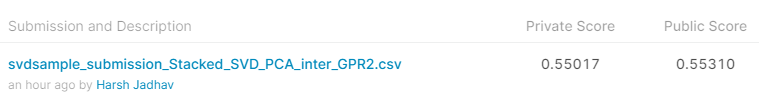

- Train R2 = 0.6530002337544227
- Test Private R2 = 0.55017
- Test Public R2 = 0.55310

With Private R2 Score 0.55017, The stacking reggressor is standing among top 28% on the leaderboard.